In [20]:
import torch
import matplotlib.pyplot as plt

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

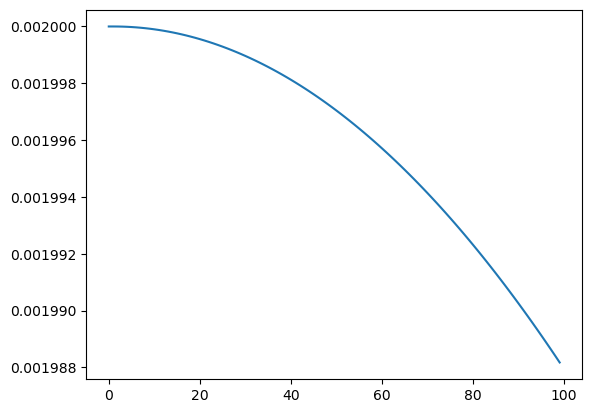

In [22]:
# para = torch.nn.parameter.Parameter(torch.ones(10,10))
optimizer = torch.optim.Adam(net.parameters(), lr=2*0.001)
scheduler =  torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer,T_0=200)
lrs = []
iters = 10
for i in range(100):
    lr = scheduler.get_last_lr()[0]
    lrs.append(lr)
    scheduler.step(i / iters)
plt.plot(lrs)

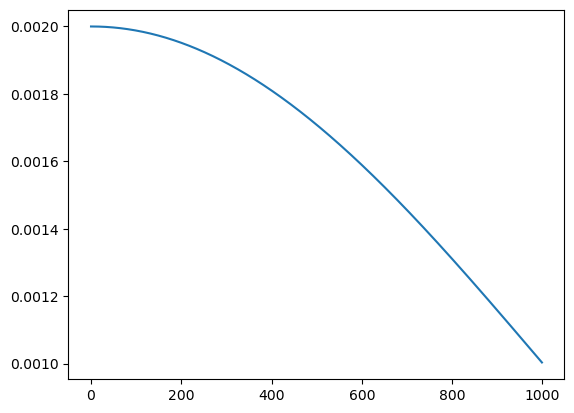

In [23]:
# para = torch.nn.parameter.Parameter(torch.ones(10,10))
optimizer = torch.optim.Adam(net.parameters(), lr=2*0.001)
scheduler =  torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer,T_0=200)
lrs = []
iters = 10
for i in range(1000):
    lr = scheduler.get_last_lr()[0]
    lrs.append(lr)
    scheduler.step(i / iters)
plt.plot(lrs)

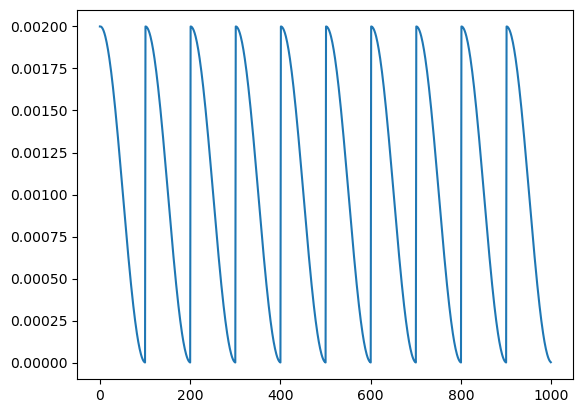

In [27]:
# para = torch.nn.parameter.Parameter(torch.ones(10,10))
optimizer = torch.optim.Adam(net.parameters(), lr=2*0.001)
scheduler =  torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer,T_0=100)
lrs = []
iters = 1
for i in range(1000):
    lr = scheduler.get_last_lr()[0]
    lrs.append(lr)
    scheduler.step(i / iters)
plt.plot(lrs)

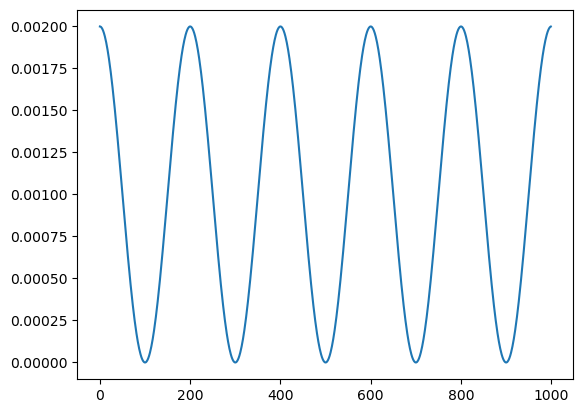

In [30]:
# para = torch.nn.parameter.Parameter(torch.ones(10,10))
optimizer = torch.optim.Adam(net.parameters(), lr=2*0.001)
scheduler =  torch.optim.lr_scheduler.CosineAnnealingLR(optimizer,T_max=100)
lrs = []
iters = 1
for i in range(1000):
    lr = scheduler.get_last_lr()[0]
    lrs.append(lr)
    scheduler.step()
plt.plot(lrs)

# torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max, eta_min=0, last_epoch=-1, verbose='deprecated')